### What are the most demanded skills for the top 3 most popular roles?



      Methodology



  
  1.Clean-up skill column


  2.Calculate skill count based on `job_title_short`


  3.Calculate skill percentage
  
  
  4.Plot final findings




In [35]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()


In [36]:
# Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [37]:
df_US = df[(df["job_country"] == 'United States')]

In [38]:
df_skills = df_US.explode("job_skills")
df_skills[["job_title_short", "job_skills"]]
df_skills_count = df_skills.groupby(["job_skills", "job_title_short"]).size()

In [39]:
df_skills_count = df_skills_count.reset_index(name='skill_count')



In [73]:
df_skills_count.sort_values(by="skill_count", ascending=False, inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
29,angular,Cloud Engineer,1
1023,nuix,Senior Data Analyst,1
52,apl,Cloud Engineer,1
1022,nuix,Machine Learning Engineer,1


In [74]:
job_titles = df_skills_count["job_title_short"].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles


['Data Analyst', 'Data Engineer', 'Data Scientist']

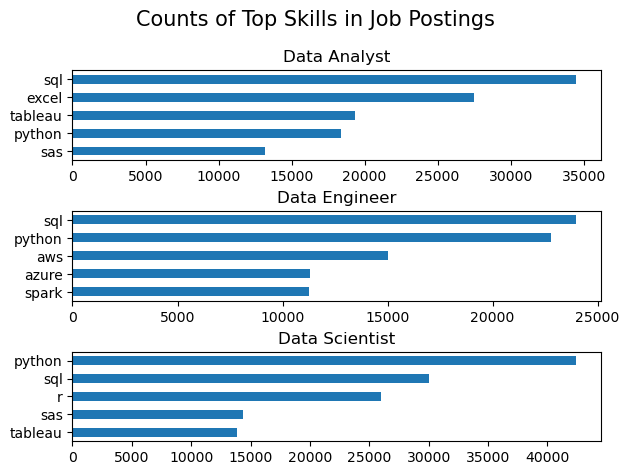

In [75]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count["job_title_short"] == job_title].head(5)
    df_plot.plot(kind="barh", x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)    
fig.tight_layout(h_pad=0.5)  # fix the overlap
plt.show()

In [78]:
df_job_title_count = df_US["job_title_short"].value_counts().reset_index(name='jobs_total')


In [82]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')
df_skills_perc["skill_percent"] = 100 * df_skills_perc["skill_count"] / df_skills_perc["jobs_total"]
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,angular,Cloud Engineer,1,423,0.236407
1866,nuix,Senior Data Analyst,1,11791,0.008481
1867,apl,Cloud Engineer,1,423,0.236407
1868,nuix,Machine Learning Engineer,1,921,0.108578


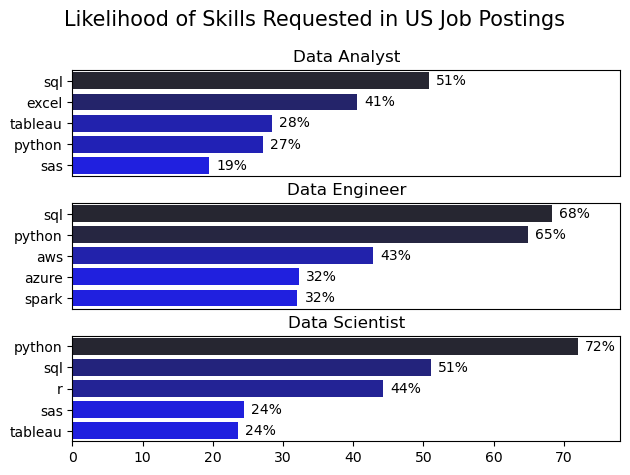

In [96]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc["job_title_short"] == job_title].head(5)
    #df_plot.plot(kind="barh", x='job_skills', y='skill_percent', ax=ax[i], title=job_title)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    #ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    #ax[i].legend().set_visible(False)
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 78)

    for n, v in enumerate(df_plot["skill_percent"]):
       ax[i].text(v+1, n, f'{v:.0f}%', va='center')

    if i != len(job_titles) - 1:
      ax[i].set_xticks([])

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)    
fig.tight_layout(h_pad=0.5)  # fix the overlap
plt.show()